### Simulating Effect Size, Sample Size, and Significance.


#### Simulating Statistical Distributions 

The [scipy.stats](https://docs.scipy.org/doc/scipy/reference/stats.html) library has many common statistical tests available. It also has methods for *simulating* data according to many common statistical distributions (e.g. like the normal distribution). Using simulated datasets is a great way to learn about how to apply statistical methods and when they can go wrong. Let's try it out.

#### Simulating Lizard Lengths

Let's suppose we were studying two species of *Anolis* lizards in the Caribbean. First let's simulate the lengths of lizards from two populations. We'll assume that the lengths of lizards in both populations are *normally distributed*. This implies that the lengths of lizards can be modeled by randomly drawing values from a [normal distribution](https://en.wikipedia.org/wiki/Normal_distribution) (normal distributions are also known as Gaussian or Gauss-Laplace distributions).


In [2]:
from scipy.stats import ttest_ind,norm

n_lizards = 100

#Simulate the lengths of lizard population 1 
pop_1_mean_size = 7.0
#Here we build a normal distribution for population 1
lizards1_dist = norm(loc= pop_1_mean_size,scale=3.0)
#Then we draw random lizards from that population 
lizards1_sample = lizards1_dist.rvs(size=n_lizards)
print("Lizards1_sample:",lizards1_sample)

#Simulate a second lizard population 
pop_2_mean_size = 10.0
lizards2_dist = norm(loc=pop_2_mean_size,scale=5.0)
lizards2_sample = lizards2_dist.rvs(size=n_lizards)
print("Lizards2_sample:",lizards2_sample)


Lizards1_sample: [ 0.90004681 10.31334653  9.56939332  7.05885818  9.03049936  8.87289821
  6.35736221  2.08431534 10.33330973  3.7066794   5.79382308  4.34728222
  9.34515371  8.94686325  6.85323564  3.26854733  8.0714356  10.22555298
  0.31980731  4.26009952  3.20799402  6.82349236  7.93544915  6.98496753
  8.80676309  9.88690757  3.03615767 15.15376114  0.27777979 11.5170155
  6.14117538  8.14844457  4.87832248  8.43372374 16.4267483   4.98870995
  7.5888698   4.12876549  5.03399357  9.06838502  5.16512388  5.19748218
  6.64712744  1.85151972  9.46441881 11.75097619  4.93726138  2.61728276
  8.87150389 11.70863645  6.89599728  2.44333391 12.40511128  9.71190933
 10.11455096  4.58961701  6.36643917  5.23544817  5.99638635  5.43136781
  4.55723987  3.36526098  4.02810007  4.22641153  8.61237061 10.85624053
  9.10409044  7.97533947  5.03849521  7.60831872  5.16471943  9.7198245
  9.20236082  6.46431958  9.51073615 13.91386945  4.2274498   7.3257718
  6.66063558 10.5940534   7.3818865  

#### Calculate some summary statistics
Just looking at the raw numbers it's a little hard to tell what's going on. 

We can characterize a sample from a normal distribution based on it's mean and standard deviation. So let's calculate those. The mean is just the statistical average (the sum of all the observations over the total). 

The standard deviation is just the square root of the variance. The variance in turn is the squared difference of each observation from the average, divided by the total number of observations.

Thus, the standard deviation effectively tells us how 'spread out' from the mean each data point is.

In [20]:
from statistics import mean,stdev
lizards1_mean = mean(lizards1_sample)
lizards2_mean = mean(lizards2_sample)

print(f"The sample mean of Lizard Population 1 is: {lizards1_mean}")
print(f"The sample mean of Lizard Population 2 is: {lizards2_mean}")

lizards1_stdev = stdev(lizards1_sample)
lizards2_stdev = stdev(lizards2_sample)

print(f"The sample standard deviation of Lizard Population 1 is: {lizards1_stdev}")
print(f"The sample standard deviation of Lizard Population 2 is: {lizards2_stdev}")

The sample mean of Lizard Population 1 is: 7.09426117338756
The sample mean of Lizard Population 2 is: 10.96405305545092
The sample standard deviation of Lizard Population 1 is: 3.2090176658942697
The sample standard deviation of Lizard Population 2 is: 5.1824028032966485


**Stop and Consider** Compare the results we just got to the true means and standard deviation of the overall lizard populations (in our simulation up above).
Are they the same or different? 

The true *population* mean is exactly 7.00 . However, when I simulate the lizards, I get a *sample* population mean of 7.09. You may get a different value, but the result is unlikely to be exactly 7.00 Similarly, while the true *population* mean for the second population should be 10.00, I get a value of 10.96 - close to 11 than to 10. 

**The take home message is that whenever we take a finite sample, the mean of that sample will generally not perfectly recapture the mean of the whole population. This will be an especially major problem if our sample is small. The bigger our sample, the closer of an approximation to the true population mean we can get.** 

A huge portion of statistical tests involve trying to figure out if the difference between what we've measured (i.e. *sample* means) reflects a real difference in the underlying biological reality (e.g. the *population* means). The same idea applies to the *sample standard deviation*, which will imperfectly approximate the *population standard deviation*.

#### Let's plot the results
To further explore this idea, let's try graphing the data using a histogram that shows our sample from each population and the observed sample means in a different color. 

In [22]:
%matplotlib inline
#^ This makes the plots show up in the notebook

from matplotlib.pyplot import hist,xlabel,ylabel,show,figure,axvline,subplots
from numpy import mean

n_bins = 20 # number of histogram bins

def plot_lizard_lengths(pop1_sample,pop2_sample,pop1_color='orange',pop2_color='cyan',alpha=0.5,
    x_axis_label="Measured value",y_axis_label="Frequency in population"):
    """Show a histogram of two population samples
    pop1_sample -- the sample from population 1. Should be a list or array of numbers. 
       for example, the observed lengths of lizards
    pop2_sample -- the sample from population 2.Should be a list or array of numbers. 
       for example, the observed lengths of lizards. 
    pop1_color -- the color for the 1st population in the histogram
    pop2_color -- the color for the 2nd population in the histogram
    alpha -- how opaque to make the histogram
    x_axis_label -- a string with which to label the y-axis 
    y_axis_label -- a string with which to label the y-axis
    """

    #Make a figure
    figure(dpi=300)
    
    #Plot a histogram of the data from each lizard population on the figure
    #NOTE: alpha is a measure of opacity - lower = more transparent
    subplots(1,1)
    hist(pop1_sample,bins=n_bins,color='orange',alpha=0.5)
    hist(pop2_sample,bins=n_bins,color='cyan',alpha=0.5)

    #Draw a vertical line at the mean value for the 1st population
    pop1_sample_mean = mean(pop1_sample)
    axvline(pop1_sample_mean,color='orange')

    #Draw a vertical line at the mean value for the 2nd population
    pop2_sample_mean = mean(pop2_sample)
    axvline(pop2_sample_mean,color='cyan')

    xlabel(x_axis_label)
    ylabel(y_axis_label)

    show()

<Figure size 1800x1200 with 0 Axes>

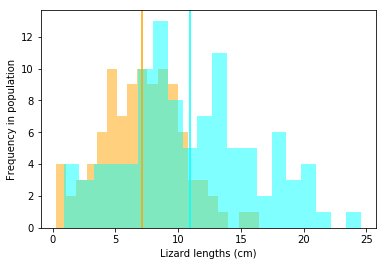

In [23]:
#Now let's run our function on our lizard data to plot it
plot_lizard_lengths(lizards1_sample,lizards2_sample,x_axis_label="Lizard lengths (cm)")

#### Testing significance using a T-test

The graph shows a difference, but it may not be obvious whether that difference could be due to chance. Let's test if the distributions are significantly different using a T-test for independence. The T-test for independence will give us a **p-value** that tells us the chances of getting an effect as big as the one we really saw under our null hypothesis. In this case the null hypothesis is that both populations of lizards are really the same length. 

Thus in this case the p-value tells us **the chances that the observed difference in *sample means* between populations could be produced by two populations whose *populations means* are identical**. In other words, it's going to tell us the chances that we could get an apparent difference in lizard length from a population of lizards that are all really the same length, just by getting unlikely in which lizards we pick. 

Here's how we would run a T-test on our lizard populations and get a p-value:

In [25]:
#NOTE: I set equal var = False because I know these two lizard populatins
#have unequal standard deviations and variance
t_stat,pval = ttest_ind(lizards1_sample,lizards2_sample,equal_var=False)
print("T statistic:",t_stat)
print("p-value:",pval)
if pval < 0.05:
    print ("This result meets the conventional threshold for statistical significance")

T statistic: -6.348606826267499
p-value: 2.0162176919026045e-09
This result meets the conventional threshold for statistical significance


### Effect size, sample size, and significance

We now have a framework to demonstrate for ourselves a fundamental feature of statistics: the interaction between effect size, sample size, and statistical significance.

**Stop and Consider**. How do you expect increasing the number of lizards we measure to affect the p-value from the T-test, given that we know there is a real difference is the population means? How would you expect the p-value to change if the effect size (the real difference in the population means) was larger? What if it was smaller?

Now test your predictions by modifying the above code:

1. Try changing the above code so that the difference in lizard lengths between the population is smaller (do this without changing any other parameters). Does the p-value go up (indicating a greater probability of getting the observed difference between populations by chance)?

2. Now increase the sample size (number of lizards sampled). What happens to the p-value?




You an try this yourself or check out the code below...

### A larger simulation of effect size, sample size and statistical significance

If you did the above exercise, you may have noticed some general principles. It turns out that some of these can give clues to how statistical tests work in general. Here are the two I'd like to emphasize:

1. **Sample size increases the statistical significance of real effects.** For any effect size that is greater than 0 - that is, as long as there is a real difference in lizard length between our populations - the more samples you take, the lower the p-value. 

2. **Larger effect sizes require *fewer* samples to detect significance.** If one set of lizards were ten times as long as the other on average, we wouldn't have to measure very many lizards before we'd see a significant difference. On the other hand, if the lizards only showed a tiny percent difference, we might have to measure huge numbers of lizards before we were sure that we were right.

You may also be getting frustrated by doing this manually. That's a fine instinct to listen to! It *is* laborious and haphazard to do this by hand. Instead, we can automate the process in a for loop using lots of different effect sizes and sample sizes to see for ourselves the relationship between effect size, sample size, and statistical significance. 

First, let's write our above simulation of lizard populations and then t-test for independence  as a function so it is easier to reuse

In [6]:

def simulate_lizard_pop_t_test(pop1_mean,pop2_mean,pop1_std_dev=2.0,pop2_std_dev=2.0,sample_size=100):
    """Simulate a t-test comparing two lizard populations"""
    
    n_lizards = sample_size
    #Define a normal distribution for the 1st pop based on the mean and standard deviation
    lizards1_dist = norm(loc= pop1_mean,scale=pop1_std_dev)

    #Sample from that normal distribution to draw n_lizards (e.g. how many we measured)
    lizards1_sample = lizards1_dist.rvs(size=n_lizards)

    #Simulate a second lizard population in the same way
    lizards2_dist = norm(loc=pop2_mean,scale=pop2_std_dev)
    lizards2_sample = lizards2_dist.rvs(size=n_lizards)
    
    t_stat,pval = ttest_ind(lizards1_sample,lizards2_sample,equal_var=False)
    
    return pval

So if we give this function the true (simulated) means and standard deviations of two populations, along with how many lizards from each population we actually measure, it can return to us a p-value from the T-test for independence. Now let's use this function to plot what happens to our p-values at various effect sizes and sample sizes

/Users/jzaneveld/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3367: RuntimeWarning: Degrees of freedom <= 0 for slice
  **kwargs)
/Users/jzaneveld/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:132: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


<Figure size 1800x1200 with 0 Axes>

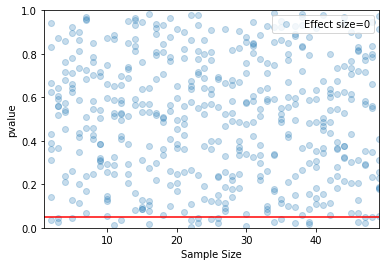

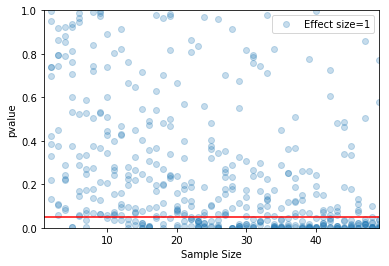

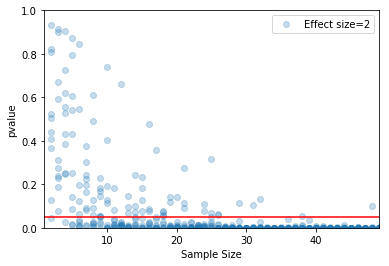

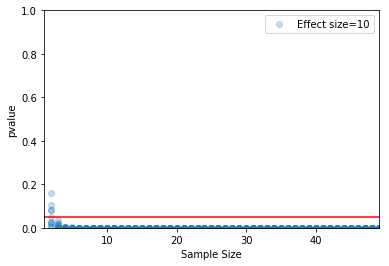

In [7]:
from matplotlib.pyplot import figure,plot,subplots,axis,legend,axhline
from matplotlib.colors import Normalize
effect_sizes = [0,1,2,10]
sample_sizes = [int(x) for x in range(1,50,1)]

#Define population parameters
pop1_mean = 70.0

# We will define the population 2 mean
#below relative to population 1
#using the effect size
pop2_mean = None 

#Set the standard deviation 
#for each population
pop1_std_dev = 2.0
pop2_std_dev = 2.0

n_replicates = 10
figure(dpi=300)
#Iterate over the effect sizes, making a plot
#of p-values vs. sample size for each

for effect_size in effect_sizes:
    
    #This tells matplotlib to make this effect size
    #a new subplot
    subplots(1,1) 
    
    #Set the x and y axis limits (xmin,xmax,ymin,ymax)
    axis([min(sample_sizes),max(sample_sizes),0.0,1.0])
    
    #We'll store the individual sample sizes
    #and p-values in lists
    all_pvals = []
    all_sample_sizes = [] 
    
    #For now let's just assume that the mean size
    #of lizards in population 2 is larger than population 1
    #by an amount equal to effect size
    pop2_mean = pop1_mean + effect_size
    
    #Test the p-value we get from a T-test at each sample size
    #repeat n_replicates times
    for n in sample_sizes:
        for i in range(n_replicates):
            pval = simulate_lizard_pop_t_test(pop1_mean=pop1_mean,\
                                              pop2_mean=pop2_mean,\
                                              pop1_std_dev = pop1_std_dev,\
                                              pop2_std_dev = pop2_std_dev,\
                                              sample_size = n)
            all_pvals.append(pval)
            all_sample_sizes.append(n)
    
    
    plot(all_sample_sizes,all_pvals,'o',\
     label="Effect size=%s" %effect_size,alpha=0.25)
    
    #Label p = 0.05 (the standard cutoff for statistical significance)
    #with a horizontal red line
    axhline(y=0.05, color='r', linestyle='-')
    legend(loc='upper right')
    xlabel("Sample Size")
    ylabel("pvalue")



In the above plots the x-axis represents the sample size, while the y-axis represents the p-value for our T-test of independence between the two populations of lizards. Each graph going down is a larger effect size (here the difference in means between the two populations).

There are several things to notice here:

1. __We get significant results 5% of the time even if there is *no difference* between the populations__. Even when the effect size is 0 (top graph), some runs of the simulation give significant results. This is represented by p-values below the red line (p < 0.05) in the first graph. These represent *false positive* results (also called Type I errors). By definition, we expect these to occur 5% of the time (that's what we mean when we say p = 0.05!). This is critically important to understand - we'll draw on and explore this idea much more in the section on dealing with multiple comparisons.

2. __Increasing sample size gives us greater power to establish that differences between the populations are statistically significant__. If there *is* a true difference in size between the lizard populations (e.g. effect size > 0), then the more lizards we measure (i.e. the larger the sample size), the more likely we are to see that difference as statistically significant. You can verify this by noting that the further right we move on the x-axis in any of the bottom 3 graphs, the more points fall below the threshold for significance of p = 0.05 (i.e. below the red line).

3. __As the effect size increases, fewer samples are required to establish statistical significance__. In the second graph, where the lizard populations differ by 1 cm in mean length, we *still* don't always see statistical significance, even when we measure 50 lizards from each population. In the bottom graph, where lizards differ in length by 10cm on average, we only need to measure roughly 5-10 lizards from each population to establish that they significantly differ in length. 

#### Exercises

1. **How do you think increasing the standard deviation of lengths within the two populations of lizards will affect our ability to detect significant differences?** 

2. **Modify the simulation to double the standard deviation of lengths within each population**. How does doubling the standard deviation affect the statistical significance across effect sizes?  How big of a deal was this change of standard deviation relative to sample size?
